Question 1:Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
                Occupatios

In [1]:
#Step 1. Import the necessary libraries
import pandas as occupations_pnds

#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users
users = occupations_pnds.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
#Step 4. Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [4]:
#step 5 Discover the Male ratio per occupation and sort it from the most to the least
users.groupby('occupation').gender.count().sort_values(ascending=False)

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: gender, dtype: int64

In [5]:
#step 6  For each occupation, calculate the minimum and maximum ages
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
#step 7 For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [9]:
#step 8 For each occupation present the percentage of women and men
individual_occupation_gender_count = users.groupby(['occupation']).agg('count')
individual_occupation_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'}).div(individual_occupation_gender_count) * 100
individual_occupation_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question2:Euro Teams

In [6]:
#Step 1. Import the necessary libraries
import pandas as teams_pnds

#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro12 = teams_pnds.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

#Step 4. Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [11]:
#Step 5. How many team participated in the Euro2012?
euro12['Team'].count()

16

In [12]:
#Step 6. What is the number of columns in the dataset?
len(euro12.columns)

35

In [13]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ['Red Cards','Yellow Cards'], ascending=True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [7]:
#Step 9. Calculate the mean Yellow Cards given per Team
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [8]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
#Step 11. Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [9]:
#Step 12. Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
#Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [20]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [11]:
#Question3: Housing 
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
print("Step 1: Libraries imported successfully.")


Step 1: Libraries imported successfully.


In [12]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))
print("\nStep 2: 3 Series created successfully.")
print("Series 1:")
print(series1)
print("\nSeries 2:")
print(series2)
print("\nSeries 3:")
print(series3)


Step 2: 3 Series created successfully.
Series 1:
0     3
1     1
2     2
3     4
4     1
     ..
95    1
96    2
97    3
98    3
99    4
Length: 100, dtype: int32

Series 2:
0     3
1     3
2     2
3     3
4     2
     ..
95    1
96    2
97    1
98    2
99    1
Length: 100, dtype: int32

Series 3:
0     10691
1     19098
2     16145
3     18736
4     13631
      ...  
95    12435
96    22383
97    11849
98    24000
99    25679
Length: 100, dtype: int32


In [13]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})
print("\nStep 3: DataFrame created successfully.")
print("\nDataFrame:")
print(df)


Step 3: DataFrame created successfully.

DataFrame:
    bedrs  bathrs  price_sqr_meter
0       3       3            10691
1       1       3            19098
2       2       2            16145
3       4       3            18736
4       1       2            13631
..    ...     ...              ...
95      1       1            12435
96      2       2            22383
97      3       1            11849
98      3       2            24000
99      4       1            25679

[100 rows x 3 columns]


In [14]:

# Step 4: Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("\nStep 4: Columns renamed successfully.")
print("\nDataFrame with renamed columns:")
print(df)


Step 4: Columns renamed successfully.

DataFrame with renamed columns:
    bedrs  bathrs  price_sqr_meter
0       3       3            10691
1       1       3            19098
2       2       2            16145
3       4       3            18736
4       1       2            13631
..    ...     ...              ...
95      1       1            12435
96      2       2            22383
97      3       1            11849
98      3       2            24000
99      4       1            25679

[100 rows x 3 columns]


In [15]:

# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)
print("\nStep 5: One-column DataFrame created successfully.")
print("\nOne-column DataFrame:")
print(bigcolumn)


Step 5: One-column DataFrame created successfully.

One-column DataFrame:
0          3
1          1
2          2
3          4
4          1
       ...  
295    12435
296    22383
297    11849
298    24000
299    25679
Length: 300, dtype: int32


In [16]:



# Step 6: Check if it is going only until index 99
print("\nStep 6: Is it true that it is going only until index 99?")
print(bigcolumn.index.max() == 99)



Step 6: Is it true that it is going only until index 99?
False


In [17]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
df = df.reindex(range(300))
print("\nStep 7: DataFrame reindexed successfully.")
print("\nDataFrame after reindexing:")
print(df)


Step 7: DataFrame reindexed successfully.

DataFrame after reindexing:
     bedrs  bathrs  price_sqr_meter
0      3.0     3.0          10691.0
1      1.0     3.0          19098.0
2      2.0     2.0          16145.0
3      4.0     3.0          18736.0
4      1.0     2.0          13631.0
..     ...     ...              ...
295    NaN     NaN              NaN
296    NaN     NaN              NaN
297    NaN     NaN              NaN
298    NaN     NaN              NaN
299    NaN     NaN              NaN

[300 rows x 3 columns]


# Question4:
Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day


In [36]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime as datetime

In [28]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime as datetime
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.





# Importing the dataset and assigning it to a variable called data
data = pd.read_csv('C:\\Users\\rajpu\\Downloads\\wind.txt', delim_whitespace=True)

data["Date"] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)
data = data[['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']]
data.head()






,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [39]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix(x):
    if x.year > 1900:
         year = x.year - 100
    else: 
        year = x.year
    
    return datetime.date(year,x.month,x.day)

#db['Yr_Mo_Dy'] = db['Yr_Mo_Dy'].apply(fix)

In [36]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
#db['Yr_Mo_Dy'] = pd.to_datetime(db['Yr_Mo_Dy'])
# Convert the 'Yr_Mo_Dy' column to datetime format and set it as the index
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [42]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
#data.isnull().values.ravel().sum()
# Count missing values for each location
missing_values_per_location = data.isnull().sum()

# Display the result
print(missing_values_per_location)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [46]:
#Step 7. Compute how many non-missing values there are in total
m = data.count()
print("Non-missing Values are:",m.sum())

Non-missing Values are: 78857


In [47]:
#step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
average_windspeeds = data.mean().mean()
print("Average windspeeds: ", round(average_windspeeds, 2))

Average windspeeds:  10.23


In [48]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days

# Convert all values in the DataFrame to numeric, coercing errors to NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Calculate statistics for each location
loc_stats = pd.DataFrame()
loc_stats['min'] = data_numeric.min()  # Minimum windspeed for each location
loc_stats['max'] = data_numeric.max()  # Maximum windspeed for each location
loc_stats['mean'] = data_numeric.mean()  # Mean windspeed for each location
loc_stats['std'] = data_numeric.std()  # Standard deviation of windspeed for each location

# Display the resulting DataFrame
print(loc_stats)


      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [52]:
# Step 10. Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days

loc_stats = data.describe().loc[['mean','std','min','max'], :]
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [55]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
# Filter the DataFrame to include only January data
january_data = data[data.index.month == 1]

# Calculate the average windspeed for each location in January
average_windspeed_january = january_data.mean()

# Display the average windspeed for each location in January
print("Average windspeed in January for each location:")
print(average_windspeed_january)


Average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [56]:
#Step 12. Downsample the record to a yearly frequency for each location.
yearly_group = data.groupby(lambda x: x.year)
yearly_group.mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027
1971,11.273123,9.095178,11.088329,5.241507,9.440329,6.097151,8.385890,6.757315,7.915370,7.229753,12.208932,15.025233
1972,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1973,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1974,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1975,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
1976,11.737842,10.203115,10.761230,5.109426,8.846339,6.311038,9.149126,7.146202,8.883716,7.883087,12.332377,15.471448
1977,13.099616,11.144493,12.627836,6.073945,10.003836,8.586438,11.523205,8.378384,9.098192,8.821616,13.459068,16.590849


In [61]:
#Step 13. Downsample the record to a monthly frequency for each location
data.groupby(data.index.to_period('M')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1969-01,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742
1969-02,13.504643,10.426786,14.240714,7.326786,11.314643,5.482857,10.983929,8.747143,8.994286,9.081071,14.334643,19.786786
1969-03,10.398710,8.533226,12.277419,6.125161,9.618065,4.942581,9.193226,8.503226,8.376129,7.800968,10.394194,16.420000
1969-04,12.591333,9.769333,10.828000,6.937333,11.304667,5.578000,9.383333,8.141667,9.201333,8.370333,11.905667,14.124000
1969-05,9.419032,7.941935,9.298387,5.137097,8.618710,5.391935,6.309032,5.752581,5.907419,6.317419,9.332258,11.794839
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-08,9.231935,6.870323,13.075161,6.074839,8.954516,4.835484,6.752903,6.429677,5.882258,4.733548,10.793226,9.819032
2068-09,12.137000,11.160667,12.008000,6.886000,11.718667,6.497333,9.476000,8.504000,7.781333,7.584000,12.900333,13.583667
2068-10,12.521290,11.755484,11.235161,6.433871,11.381935,6.554516,8.357742,9.450645,8.102258,8.370968,14.871935,16.388065


In [64]:
#Step 14. Downsample the record to a weekly frequency for each location
# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()

# Display the resulting DataFrame
print(weekly_data)


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1968-12-30/1969-01-05,5.884000,3.958000,6.758000,2.752000,5.416000,2.392000,8.626000,4.388000,5.640000,7.160000,11.510000,16.108000
1969-01-06/1969-01-12,14.708571,12.521429,15.135714,6.851429,11.940000,6.744286,10.591429,9.174286,9.107143,10.124286,12.130000,20.385714
1969-01-13/1969-01-19,15.030000,16.452857,10.778571,7.774286,12.590000,6.821429,9.998571,8.815714,9.078571,8.385714,13.624286,14.248571
1969-01-20/1969-01-26,14.438571,14.267143,13.017143,7.721429,10.607143,7.114286,8.537143,10.030000,7.720000,10.720000,15.475714,15.827143
1969-01-27/1969-02-02,13.510000,11.917143,10.702857,8.111429,11.581429,5.612857,12.305714,8.394286,10.437143,10.771429,15.757143,20.284286
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-12-03/2068-12-09,9.251429,10.535714,12.772857,5.142857,8.684286,4.720000,7.632857,6.535714,6.081429,8.310000,10.855714,15.102857
2068-12-10/2068-12-16,12.047143,10.464286,10.857143,4.685714,8.707143,4.780000,6.470000,6.095714,6.302857,7.690000,10.970000,14.588571
2068-12-17/2068-12-23,18.220000,15.165714,15.737143,9.208571,13.352857,8.395714,13.701429,10.178571,11.177143,12.630000,15.750000,22.332857


In [68]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of thewindspeeds across all locations for each week (assume that the first week starts onJanuary 2 1961) for the first 52 weeks
# Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std'])

# Select the first 52 weeks
weekly_stats_first_52 = weekly_stats.iloc[:52]

# Display the resulting DataFrame
print(weekly_stats_first_52)


              RPT                               VAL                    \
              min    max       mean       std   min    max       mean   
Date                                                                    
1969-01-05   2.62  10.50   5.884000  2.956895  0.54   8.38   3.958000   
1969-01-12   9.33  22.34  14.708571  5.473684  3.29  18.50  12.521429   
1969-01-19   4.50  25.08  15.030000  6.915213  1.50  25.17  16.452857   
1969-01-26   4.00  20.54  14.438571  5.990624  5.13  20.25  14.267143   
1969-02-02   5.21  18.58  13.510000  5.100791  3.96  19.79  11.917143   
1969-02-09   5.17  21.50  12.698571  6.207413  1.96  19.00   9.387143   
1969-02-16  12.71  24.75  15.875714  4.448055  5.00  15.34   9.644286   
1969-02-23   8.04  27.79  15.790000  6.449098  4.25  23.58  14.047143   
1969-03-02   0.67  10.75   7.142857  3.720774  3.58  10.83   6.320000   
1969-03-09   2.29  16.46   8.975714  5.089679  3.04  10.41   6.747143   
1969-03-16   6.00  21.12  11.850000  5.362879  2.92

Question 5) Step 1. Import the necessary librariesStep 
2. Import the dataset from this address.Step 
3. Assign it to a variable called chipo.Step
4. See the first 10 entries

In [92]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [93]:
#Step 5. What is the number of observations in the dataset?
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [94]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [95]:
#Step 7. Print the name of all the columns.
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [ ]:
#Step 8. How is the dataset indexed?Step 9. Which was the most-ordered item?Step 10. For the most-ordered item, how many items were ordered?Step 11. What was the most ordered item in the choice_description column?Step 12. How many items were orderd in total?Step 13.• Turn the item price into a float• Check the item price type• Create a lambda function and change the type of item price• Check the item price typeStep 14. How much was the revenue for the period in the dataset?Step 15. How many orders were made in the period?Step 16. What is the average revenue amoun

In [96]:
#Step 8. How is the dataset indexed?


chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [97]:
#Step 9. Which was the most-ordered item?
chipo.groupby(['item_name'])['quantity'].sum().idxmax()

'Chicken Bowl'

In [99]:
 # step 10. For the most-ordered item, how many items were ordered?
chipo.groupby(['item_name'])['quantity'].sum().max()

761

In [100]:
#step 11. What was the most ordered item in the choice_description column?
chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False).head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [101]:
#Step 12. How many items were orderd in total
chipo['quantity'].sum()

4972

In [102]:
#Step 13. Turn the item price into a float
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [19]:
#Step 14. How much was the revenue for the period in the dataset?
total_revenue = df['revenue'].sum()
print("Total revenue for the period:", total_revenue)




KeyError: 'revenue'

In [106]:
#Step 15. How many orders were made in the period?
chipo['order_id'].value_counts().count()

1834

In [111]:
#Step 16. What is the average revenue amount per order?

# Remove '$' and extra spaces from the 'item_price' column
chipo['item_price'] = chipo['item_price'].str.replace('$', '').str.strip()

# Convert 'item_price' to float
chipo['item_price'] = chipo['item_price'].astype(float)

# Calculate revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

# Calculate average revenue per order
avg_rev_per_order = chipo.groupby('order_id')['revenue'].sum().mean()

# Print the result
print("Average revenue per order: ", avg_rev_per_order)


Average revenue per order:  21.39423118865867


In [112]:
#Step 17. How many different items are sold?
chipo['item_name'].nunique()

50

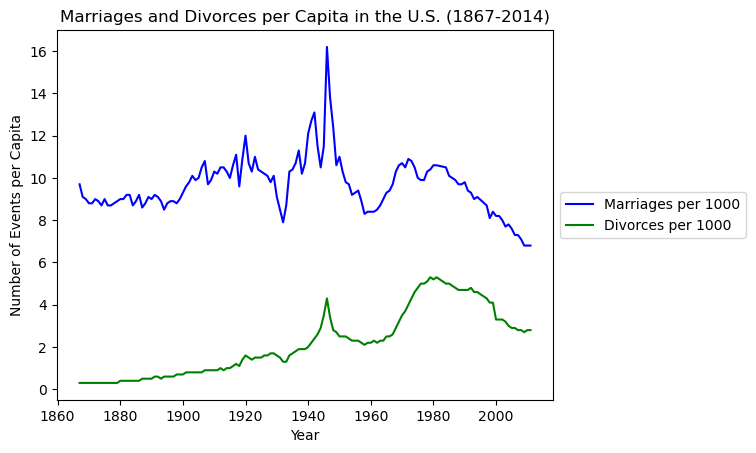

In [90]:
### Question 6
#Create a line plot showing the number of marriages and divorces per capita in the
#U.S. between 1867 and 2014. Label both lines and show the legend.
#Don't forget to label your axes!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

marriage_divorce_data = pd.read_csv(r'\Users\rajpu\Downloads\us-marriages-divorces-1867-2014.csv')

marriage_line = sns.lineplot(data=marriage_divorce_data, x="Year", y='Marriages_per_1000', label='Marriages per 1000', color='blue')
divorce_line = sns.lineplot(data=marriage_divorce_data, x="Year", y='Divorces_per_1000', label='Divorces per 1000', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Events per Capita')
plt.title("Marriages and Divorces per Capita in the U.S. (1867-2014)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

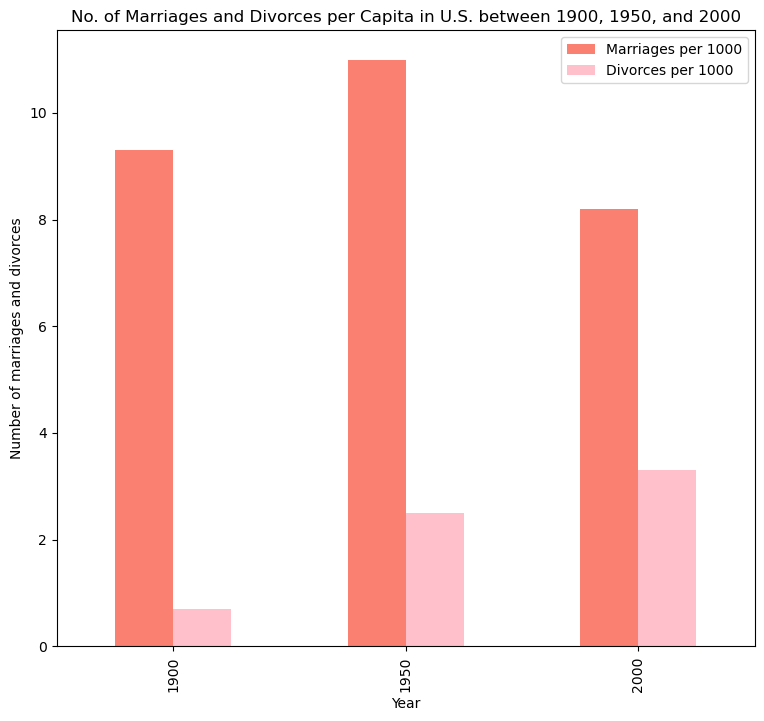

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

us_marriage_divorce_data = pd.read_csv(r'\Users\rajpu\Downloads\us-marriages-divorces-1867-2014.csv')

given_year_data = us_marriage_divorce_data[(us_marriage_divorce_data['Year'] == 1950) | 
                                           (us_marriage_divorce_data['Year'] == 1900) | 
                                           (us_marriage_divorce_data['Year'] == 2000)]

given_year_data.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="bar", 
                     figsize=(9,8), label=["Marriages per 1000", "Divorces per 1000"], color=["salmon", "pink"])

plt.xlabel('Year')
plt.ylabel('Number of marriages and divorces')
plt.title("No. of Marriages and Divorces per Capita in U.S. between 1900, 1950, and 2000")
plt.show()


### Question 8 
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

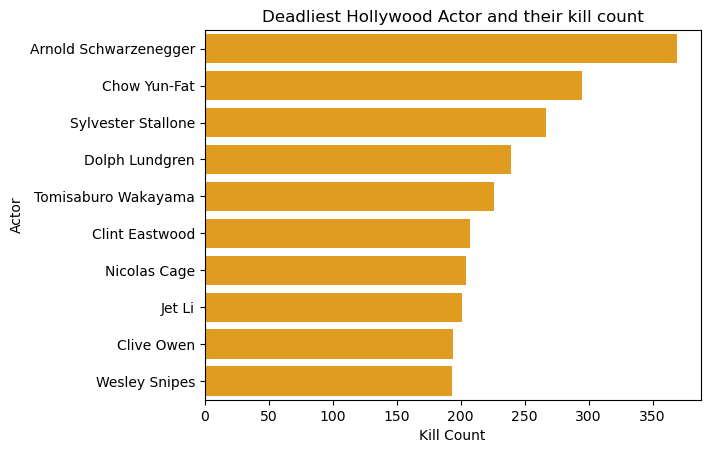

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

actor_kill_counts = pd.read_csv(r'\Users\rajpu\Downloads\actor_kill_counts.csv')

sns.barplot(x="Count", y="Actor", data=actor_kill_counts.sort_values("Count", ascending=False), color="orange")
plt.title('Deadliest Hollywood Actor and their kill count')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.show()


#Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

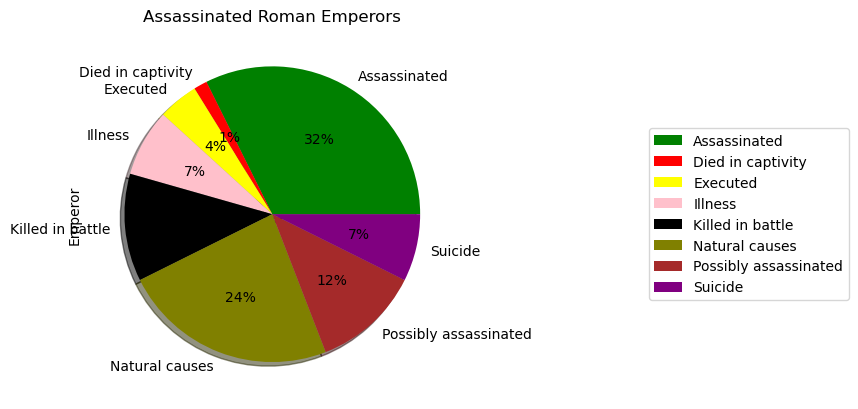

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

assassinatedRomanEmperorsSet = pd.read_csv(r'\Users\rajpu\Downloads\roman-emperor-reigns.csv')

colorList = ['green', 'red', 'yellow', 'pink', 'black', 'olive', 'brown', 'purple', 'skyblue', 'orange']
assassinatedRomanEmperorsSet.groupby(['Cause_of_Death']).count().plot(kind='pie', y='Emperor', autopct='%1.0f%%', title='Assassinated Roman Emperors', colors=colorList, shadow=True)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()


#Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science 
PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year

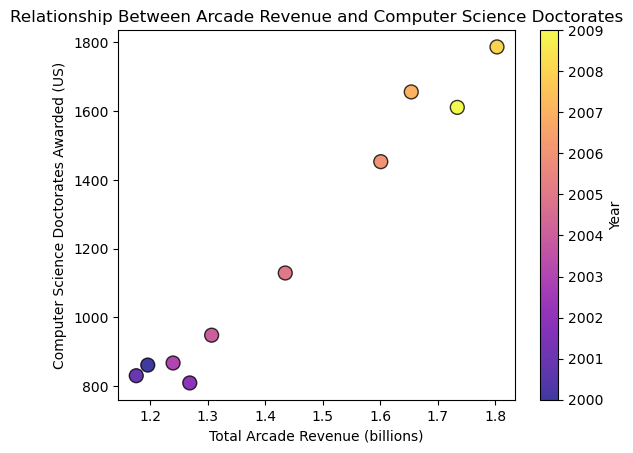

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\rajpu\Downloads\arcade-revenue-vs-cs-doctorates.csv')

years = data['Year']
revenue = data['Total Arcade Revenue (billions)']
doctorates_awarded = data['Computer Science Doctorates Awarded (US)']

# Create a scatter plot with color mapping
scatter = plt.scatter(revenue, doctorates_awarded, c=years, cmap='plasma', edgecolors='black', s=100, alpha=0.8)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and Computer Science Doctorates')

# Adding colorbar to indicate years
legend = plt.colorbar(scatter)
legend.set_label('Year')

# Showing the plot
plt.show()
